In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import os
from tqdm import tqdm
from astropy.io import fits
from astropy.wcs import WCS
from astropy.wcs.utils import pixel_to_skycoord, skycoord_to_pixel
from astropy.coordinates import SkyCoord
from astropy.nddata import Cutout2D
from scipy.ndimage.filters import gaussian_filter
tqdm.pandas()
import cmocean
import matplotlib as mpl

c:\Users\Matt\.conda\envs\astronomy\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
PATH_RAW = 'D:/Workshop/PhD/Data/ViaLactea/PPMAP_Results/'
PATH_64x85 = 'D:/Workshop/PhD/Data/ViaLactea/CNN_Results/64px_rejigged_fulltile/'
PATH_32x17 = 'D:/Workshop/PhD/Data/ViaLactea/CNN_Results/32px_rejigged_fulltile_64pxwindow/'
PATH_32x85 = 'D:/Workshop/PhD/Data/ViaLactea/CNN_Results/32px_rejigged_fulltile/'

In [3]:
no_files = len(os.listdir(PATH_32x17+'DataCubes'))
no_files

163

In [4]:
H_min, H_max = -0.25, 1.25
S_min, S_max = -0.25, 3.5
Sigma_min, Sigma_max = 0.4,3.5
l_min, l_max = 0,360


H_bins_2d = np.linspace(H_min,H_max,no_files+1)
S_bins_2d = np.linspace(S_min,S_max,no_files+1)
Sigma_bins_2d = np.linspace(Sigma_min, Sigma_max,no_files+1)
l_bins_2d = np.linspace(l_min,l_max, no_files+1)

In [5]:
hist_a = np.zeros((no_files,no_files))
hist_b = np.zeros((no_files,no_files))
hist_c = np.zeros((no_files,no_files))
hist_d = np.zeros((no_files,no_files))
hist_e = np.zeros((no_files,no_files))
hist_f = np.zeros((no_files,no_files))
hist_g = np.zeros((no_files,no_files))

a_avg = []
b_avg = []
c_avg = []
d_avg = []
e_avg = []
f_avg = []
g_avg = []

l_avg = []

for i in tqdm(range(no_files)):
    cube_64x85 = pickle.load(open(f'{PATH_64x85}/DataCubes/{os.listdir(PATH_64x85+"DataCubes")[i]}','rb'))
    cube_32x85 = pickle.load(open(f'{PATH_32x85}/DataCubes/{os.listdir(PATH_32x85+"DataCubes")[i]}','rb'))
    cube_32x17 = pickle.load(open(f'{PATH_32x17}/DataCubes/{os.listdir(PATH_32x17+"DataCubes")[i]}','rb'))

    temp_df = pd.DataFrame()
    temp_df['H_64x85'] = np.pad(cube_64x85[1],((32,31),(32,31)), 'constant', constant_values = np.nan).flatten()
    temp_df['H_32x85'] = np.pad(cube_32x85[1],((16,15),(16,15)), 'constant', constant_values = np.nan).flatten()
    temp_df['H_32x17'] = np.pad(cube_32x17[1],((32,31),(32,31)), 'constant', constant_values = np.nan).flatten()
    temp_df['S_64x85'] = np.pad(cube_64x85[2],((32,31),(32,31)), 'constant', constant_values = np.nan).flatten()
    temp_df['S_32x85'] = np.pad(cube_32x85[2],((16,15),(16,15)), 'constant', constant_values = np.nan).flatten()
    temp_df['S_32x17'] = np.pad(cube_32x17[2],((32,31),(32,31)), 'constant', constant_values = np.nan).flatten()
    temp_df['l'] = cube_64x85[3].flatten()
    temp_df['col_dens'] = np.log10(cube_64x85[0]).flatten()
    temp_df = temp_df.dropna()

    hist_a_temp, jnk, jnk = np.histogram2d(temp_df['l'],temp_df['H_32x85'],bins=[l_bins_2d,H_bins_2d])
    hist_b_temp, jnk, jnk = np.histogram2d(temp_df['l'],temp_df['H_32x17'],bins=[l_bins_2d,H_bins_2d])
    hist_c_temp, jnk, jnk = np.histogram2d(temp_df['l'],temp_df['H_64x85'],bins=[l_bins_2d,H_bins_2d])
    hist_d_temp, jnk, jnk = np.histogram2d(temp_df['l'],temp_df['S_32x85'],bins=[l_bins_2d,S_bins_2d])
    hist_e_temp, jnk, jnk = np.histogram2d(temp_df['l'],temp_df['S_32x17'],bins=[l_bins_2d,S_bins_2d])
    hist_f_temp, jnk, jnk = np.histogram2d(temp_df['l'],temp_df['S_64x85'],bins=[l_bins_2d,S_bins_2d])
    hist_g_temp, jnk, jnk = np.histogram2d(temp_df['l'],temp_df['col_dens'],bins=[l_bins_2d,Sigma_bins_2d])

    hist_a += hist_a_temp
    hist_b += hist_b_temp
    hist_c += hist_c_temp
    hist_d += hist_d_temp
    hist_e += hist_e_temp
    hist_f += hist_f_temp
    hist_g += hist_g_temp

    a_avg.append(np.mean(temp_df['H_32x85']))
    b_avg.append(np.mean(temp_df['H_32x17']))
    c_avg.append(np.mean(temp_df['H_64x85']))
    d_avg.append(np.mean(temp_df['S_32x85']))
    e_avg.append(np.mean(temp_df['S_32x17']))
    f_avg.append(np.mean(temp_df['S_64x85']))
    g_avg.append(np.mean(temp_df['col_dens']))

    if i == 0:
        l_avg.append(0)
    else:
        l_avg.append(np.mean(temp_df['l']))

100%|██████████| 163/163 [11:19<00:00,  4.17s/it]


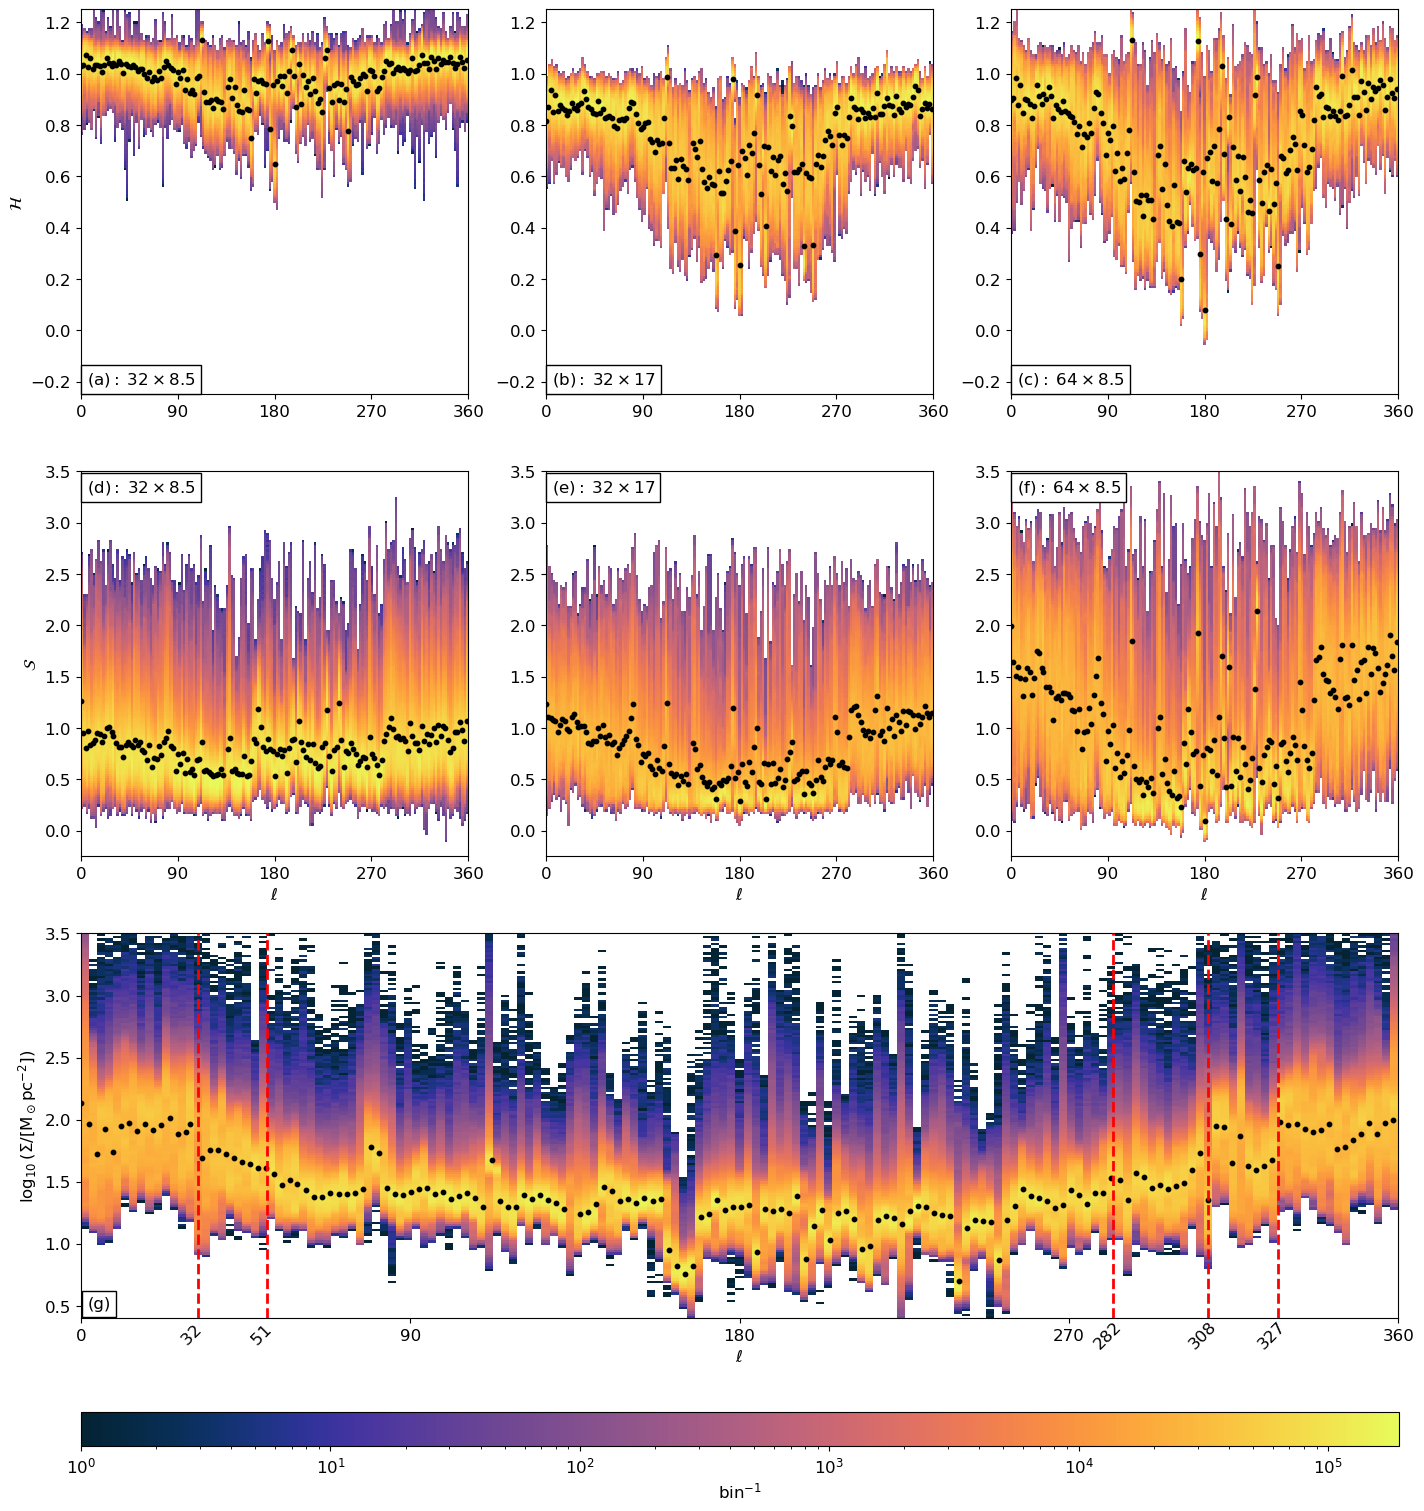

In [38]:
x = 0.015
y = 0.947
y1 = 0.027
marker_size = 10

tangent_lines = [32, 51,282, 308, 327]

plt.rcParams.update({'font.size': 12})
f,ax = plt.subplot_mosaic([['a','b','c'],
                           ['d','e','f'],
                           ['g','g','g']],
                           figsize=(17,17))

ax['a'].pcolormesh(l_bins_2d,H_bins_2d,hist_a.T, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())
ax['b'].pcolormesh(l_bins_2d,H_bins_2d,hist_b.T, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())
ax['c'].pcolormesh(l_bins_2d,H_bins_2d,hist_c.T, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())
ax['d'].pcolormesh(l_bins_2d,S_bins_2d,hist_d.T, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())
ax['e'].pcolormesh(l_bins_2d,S_bins_2d,hist_e.T, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())
img=ax['f'].pcolormesh(l_bins_2d,S_bins_2d,hist_f.T, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())
ax['g'].pcolormesh(l_bins_2d,Sigma_bins_2d,hist_g.T, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())

ax['a'].set_ylabel(r'$\mathcal{H}}$')
ax['a'].text(x, y1, r'$\mathrm{(a):}\;32\times 8.5$', transform=ax['a'].transAxes,bbox = dict(facecolor='white'))
ax['a'].scatter(l_avg,a_avg, c= 'k', s = marker_size)
ax['a'].set_xticks([0,90,180,270,360])

ax['b'].text(x, y1, r'$\mathrm{(b):}\;32\times 17$', transform=ax['b'].transAxes,bbox = dict(facecolor='white'))
ax['b'].scatter(l_avg,b_avg, c='k', s = marker_size)
ax['b'].set_xticks([0,90,180,270,360])

ax['c'].text(x, y1, r'$\mathrm{(c):}\;64\times 8.5$', transform=ax['c'].transAxes,bbox = dict(facecolor='white'))
ax['c'].scatter(l_avg,c_avg, c='k', s = marker_size)
ax['c'].set_xticks([0,90,180,270,360])

ax['d'].set_xlabel(r'$\ell$')
ax['d'].set_ylabel(r'$\mathcal{S}}$')
ax['d'].text(x, y, r'$\mathrm{(d):}\;32\times 8.5$', transform=ax['d'].transAxes,bbox = dict(facecolor='white'))
ax['d'].scatter(l_avg,d_avg, c='k', s = marker_size)
ax['d'].set_xticks([0,90,180,270,360])

ax['e'].set_xlabel(r'$\ell$')
ax['e'].text(x, y, r'$\mathrm{(e):}\;32\times 17$', transform=ax['e'].transAxes,bbox = dict(facecolor='white'))
ax['e'].scatter(l_avg,e_avg, c='k', s = marker_size)
ax['e'].set_xticks([0,90,180,270,360])

ax['f'].set_xlabel(r'$\ell$')
ax['f'].text(x, y, r'$\mathrm{(f):}\;64\times 8.5$', transform=ax['f'].transAxes,bbox = dict(facecolor='white'))
ax['f'].scatter(l_avg,f_avg, c='k', s = marker_size)
ax['f'].set_xticks([0,90,180,270,360])

ax['g'].scatter(l_avg,g_avg, c='k', s = marker_size)
ax['g'].set_xlabel(r'$\ell$')
ax['g'].set_ylabel(r'$\log_{10}(\Sigma /[\mathrm{M}_\odot \mathrm{pc}^{-2}])$')
ax['g'].text(x-0.01, y1, '(g)', transform=ax['g'].transAxes,bbox = dict(facecolor='white'))
ax['g'].set_xticks([0,90,180,270,360])

fill = ' '
align = '>'
for tangent_line in tangent_lines:
    ax['g'].axvline(tangent_line, c='r', linestyle='--', lw=2, zorder=10)
    ax['g'].text(tangent_line-6, 0.16, f'{tangent_line:{fill}{align}3}', rotation = 45)

ax['d'].xaxis.set_tick_params(labelbottom=True)
ax['e'].xaxis.set_tick_params(labelbottom=True)
ax['f'].xaxis.set_tick_params(labelbottom=True)

cbaxes = f.add_axes([0.1252, 0.035, 0.775, 0.02]) 
cb = plt.colorbar(img,orientation="horizontal", cax = cbaxes, label=r'$\mathrm{bin}^{-1}$')

plt.savefig('D:\Workshop\PhD\Papers\HiGal paper\Images/HSvl.png',bbox_inches="tight")
plt.show()

In [6]:
raw_folders = os.listdir(PATH_RAW)

  0%|          | 0/163 [00:02<?, ?it/s]


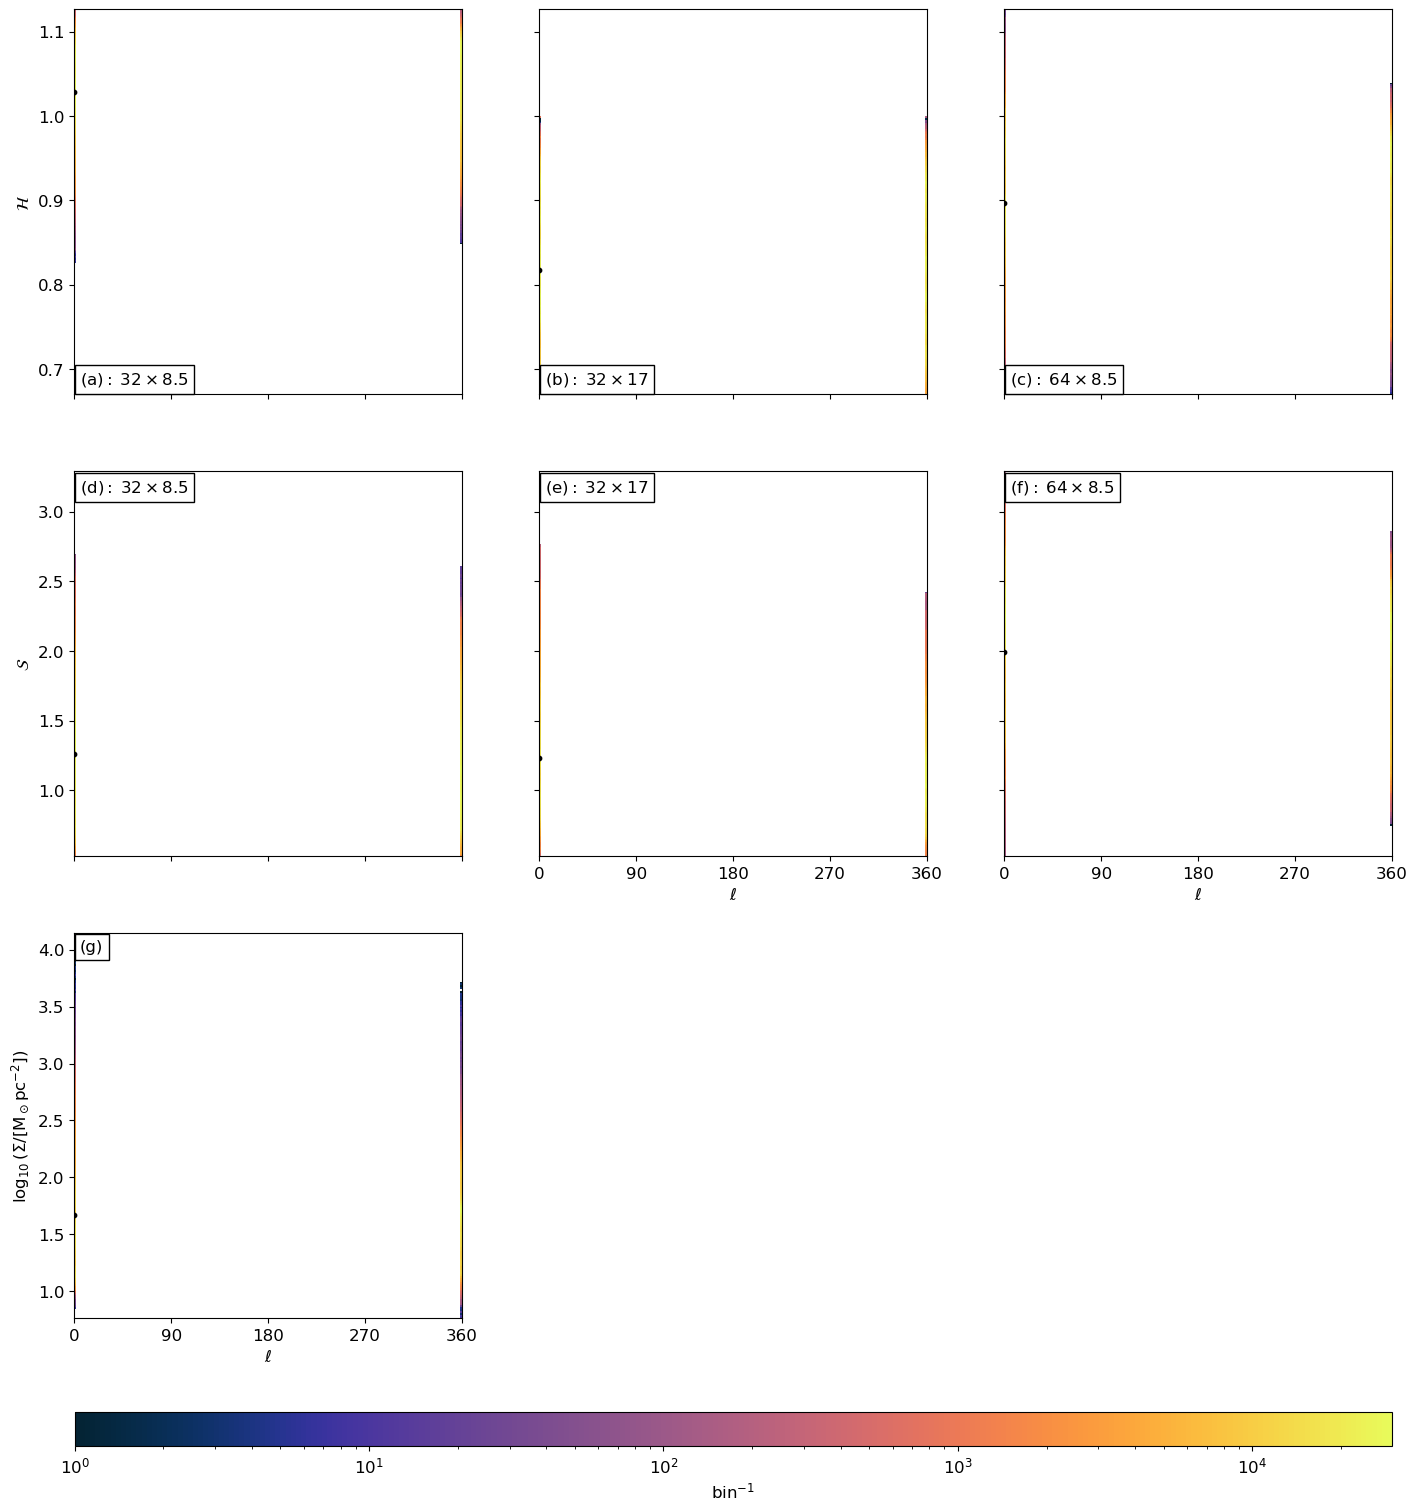

In [8]:
plt.rcParams.update({'font.size': 12})
f,ax = plt.subplots(3,3, figsize=(17,17), sharex = True, sharey = 'row')

x = 0.015
y = 0.947
y1 = 0.027
marker_size = 10

df = pd.DataFrame(columns = ['H_32x85','S_32x85', 'l'])

H_avg = []
S_avg = []
l_avg = []

for i in tqdm(range(no_files)):
    
    cube_32x85 = pickle.load(open(f'{PATH_32x85}/DataCubes/{os.listdir(PATH_32x85+"DataCubes")[i]}','rb'))

    temp_df = pd.DataFrame()
    temp_df['H_32x85'] = np.pad(cube_32x85[1],((16,15),(16,15)), 'constant', constant_values = np.nan).flatten()
    temp_df['S_32x85'] = np.pad(cube_32x85[2],((16,15),(16,15)), 'constant', constant_values = np.nan).flatten()
    temp_df['l'] = cube_32x85[3].flatten()

    temp_df = temp_df.dropna()
    H_avg.append(np.mean(temp_df['H_32x85']))
    S_avg.append(np.mean(temp_df['S_32x85']))
    if i == 0:
        l_avg.append(0)
    else:
        l_avg.append(np.mean(temp_df['l']))
    
    df = pd.concat([df,temp_df])
    
ax[0,0].hist2d(df['l'],df['H_32x85'],bins=200, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())
ax[0,0].set_ylabel(r'$\mathcal{H}}$')
ax[0,0].text(x, y1, r'$\mathrm{(a):}\;32\times 8.5$', transform=ax[0,0].transAxes,bbox = dict(facecolor='white'))
ax[0,0].scatter(l_avg,H_avg, c= 'k', s = marker_size)

ax[1,0].hist2d(df['l'],df['S_32x85'],bins=200, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())
ax[1,0].set_ylabel(r'$\mathcal{S}}$')
ax[1,0].text(x, y, r'$\mathrm{(d):}\;32\times 8.5$', transform=ax[1,0].transAxes,bbox = dict(facecolor='white'))
ax[1,0].scatter(l_avg,S_avg, c='k', s = marker_size)

H_avg = []
S_avg = []
l_avg = []

df = pd.DataFrame(columns = ['H_32x17','S_32x17', 'l'])
for i in tqdm(range(no_files)):
    
    cube_32x17 = pickle.load(open(f'{PATH_32x17}/DataCubes/{os.listdir(PATH_32x17+"DataCubes")[i]}','rb'))

    temp_df = pd.DataFrame()
    temp_df['H_32x17'] = np.pad(cube_32x17[1],((32,31),(32,31)), 'constant', constant_values = np.nan).flatten()
    temp_df['S_32x17'] = np.pad(cube_32x17[2],((32,31),(32,31)), 'constant', constant_values = np.nan).flatten()
    temp_df['l'] = cube_32x17[3].flatten()
    temp_df = temp_df.dropna()
    
    H_avg.append(np.mean(temp_df['H_32x17']))
    S_avg.append(np.mean(temp_df['S_32x17']))
    if i == 0:
        l_avg.append(0)
    else:
        l_avg.append(np.mean(temp_df['l']))
    
    df = pd.concat([df,temp_df])
    
ax[0,1].hist2d(df['l'],df['H_32x17'],bins=200, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())
ax[0,1].text(x, y1, r'$\mathrm{(b):}\;32\times 17$', transform=ax[0,1].transAxes,bbox = dict(facecolor='white'))
ax[0,1].scatter(l_avg,H_avg, c='k', s = marker_size)

ax[1,1].hist2d(df['l'],df['S_32x17'],bins=200, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())
ax[1,1].set_xlabel(r'$\ell$')
ax[1,1].text(x, y, r'$\mathrm{(e):}\;32\times 17$', transform=ax[1,1].transAxes,bbox = dict(facecolor='white'))
ax[1,1].scatter(l_avg,S_avg, c='k', s = marker_size)

H_avg = []
S_avg = []
l_avg = []

df = pd.DataFrame(columns = ['H_64x85','S_64x85', 'l'])
for i in tqdm(range(no_files)):
    
    cube_64x85 = pickle.load(open(f'{PATH_64x85}/DataCubes/{os.listdir(PATH_64x85+"DataCubes")[i]}','rb'))
    
    temp_df = pd.DataFrame()
    temp_df['H_64x85'] = np.pad(cube_64x85[1],((32,31),(32,31)), 'constant', constant_values = np.nan).flatten()
    temp_df['S_64x85'] = np.pad(cube_64x85[2],((32,31),(32,31)), 'constant', constant_values = np.nan).flatten()
    temp_df['l'] = cube_64x85[3].flatten()
    
    temp_df = temp_df.dropna()
    
    H_avg.append(np.mean(temp_df['H_64x85']))
    S_avg.append(np.mean(temp_df['S_64x85']))
    if i == 0:
        l_avg.append(0)
    else:
        l_avg.append(np.mean(temp_df['l']))
    
    df = pd.concat([df,temp_df])
    
ax[0,2].hist2d(df['l'],df['H_64x85'],bins=200, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())
ax[0,2].text(x, y1, r'$\mathrm{(c):}\;64\times 8.5$', transform=ax[0,2].transAxes,bbox = dict(facecolor='white'))
ax[0,2].scatter(l_avg,H_avg, c='k', s = marker_size)

ax[1,2].hist2d(df['l'],df['S_64x85'],bins=200, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())
ax[1,2].set_xlabel(r'$\ell$')
ax[1,2].text(x, y, r'$\mathrm{(f):}\;64\times 8.5$', transform=ax[1,2].transAxes,bbox = dict(facecolor='white'))
ax[1,2].scatter(l_avg,S_avg, c='k', s = marker_size)
ax[1,2].set_xticks([0,90,180,270,360])


l_avg = []
cdens_avg = []

df = pd.DataFrame(columns = ['Sigma','l'])
for i in tqdm(range(no_files)):
    direction = raw_folders[i][1:4]
    hdu = fits.open(f'{PATH_RAW}{raw_folders[i]}/l{direction}_cdens.fits')[0]
    wcs = WCS(hdu.header)
    cdens = hdu.data.byteswap().newbyteorder()
    xi = np.arange(0,np.shape(cdens)[0])
    yi = np.arange(0,np.shape(cdens)[1])
    xx, yy = np.meshgrid(xi, yi)
    coords_grid = pixel_to_skycoord(xx,yy, wcs)
    
    temp_df = pd.DataFrame()
    temp_df['Sigma'] = np.log10(cdens.flatten()/2.72)
    temp_df['l'] = coords_grid.l.degree.flatten()

    temp_df = temp_df.dropna()
    if i == 0:
        l_avg.append(int(direction))
    else:
        l_avg.append(np.mean(temp_df['l']))
    cdens_avg.append(np.mean(temp_df['Sigma']))

    df = pd.concat([df,temp_df])
    
_,_,_,image = ax[2,0].hist2d(df['l'], df['Sigma'],bins=200, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())
ax[2,0].scatter(l_avg,cdens_avg, c='k', s = marker_size)
ax[2,0].set_xlabel(r'$\ell$')
ax[2,0].set_ylabel(r'$\log_{10}(\Sigma /[\mathrm{M}_\odot \mathrm{pc}^{-2}])$')
ax[2,0].text(x, y+0.005, '(g)', transform=ax[2,0].transAxes,bbox = dict(facecolor='white'))

ax[2,1].axis('off')
ax[2,2].axis('off')

ax[1,1].xaxis.set_tick_params(labelbottom=True)
ax[1,2].xaxis.set_tick_params(labelbottom=True)

cbaxes = f.add_axes([0.1252, 0.035, 0.775, 0.02]) 
cb = plt.colorbar(image,orientation="horizontal", cax = cbaxes, label=r'$\mathrm{bin}^{-1}$')

ax[1,2].set_xticks([0,90,180,270,360])

plt.savefig('D:\Workshop\PhD\Papers\HiGal paper\Images/HSvl.png',bbox_inches="tight")
plt.show()